In [4]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib

json_path = '/mnt/c/Code/cancer-survival-rates/data/case_studies.json'

In [5]:
data = pd.read_json('/mnt/c/Code/cancer-survival-rates/data/case_studies.json')

In [6]:
demos = data['demographic']

In [13]:
data = data.dropna(subset=['demographic'])

In [15]:
flat = demos.apply(pd.io.json.json_normalize)

In [19]:
with open(json_path) as json_file:
    rawData = json.load(json_file)

In [21]:
fData = json_normalize(rawData)

In [23]:
json_normalize(data['demographic'])

,updated_datetime,created_datetime,gender,demographic_id,state,race,vital_status,submitter_id,ethnicity,cause_of_death,age_is_obfuscated,occupation_duration_years,cause_of_death_source,year_of_birth,days_to_birth,weeks_gestation_at_birth,days_to_death,year_of_death,age_at_index,premature_at_birth
0,2019-04-26T16:46:11.690380-05:00,2017-06-19T11:42:44.248885-05:00,female,4d0c7e80-79f9-43b2-aecc-9627c4df2138,released,not reported,Not Reported,AD1602_demographic,not reported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-19T10:19:29.140531-06:00,2018-10-03T01:57:52.306175-05:00,male,6bafc55e-cfc7-4569-82ac-4c4093ca7d9f,released,white,Not Reported,GENIE-MSK-P-0000344_demo,not hispanic or latino,None,NaN,NaN,NaN,NaN,-18993.0,NaN,NaN,NaN,18993.0,NaN
2,2019-11-19T10:19:29.140531-06:00,2018-10-03T02:16:21.359476-05:00,male,b2c4ac65-af85-4045-8c73-5f491b1a1e7e,released,white,Not Reported,GENIE-MSK-P-0006425_demo,not hispanic or latino,None,NaN,NaN,NaN,NaN,-21915.0,NaN,NaN,NaN,21915.0,NaN
3,2019-11-19T10:19:29.140531-06:00,2018-10-03T02:08:10.928833-05:00,female,4e9b90f1-8a65-458f-aa8b-3ba47a0a6483,released,other,Not Reported,GENIE-MSK-P-0016345_demo,hispanic or latino,None,NaN,NaN,NaN,NaN,-22645.0,NaN,NaN,NaN,22645.0,NaN
4,2019-11-18T13:54:59.294543-06:00,2018-09-13T18:15:17.424980-05:00,male,c3b8546e-3357-4482-8d2b-598c85ccb23b,released,white,Not Reported,GENIE-DFCI-037981_demo,not hispanic or latino,None,NaN,NaN,NaN,NaN,-21915.0,NaN,NaN,NaN,21915.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83082,2019-11-19T10:19:29.140531-06:00,2018-10-03T02:08:10.928833-05:00,female,ddb149ab-861f-45dd-a6b4-ad3337610d99,released,Unknown,Not Reported,GENIE-MSK-P-0003045_demo,not hispanic or latino,None,NaN,NaN,NaN,NaN,-24471.0,NaN,NaN,NaN,24471.0,NaN
83083,2019-07-31T19:12:59.683570-05:00,None,female,40d1822f-29fe-5d63-9aea-172908494fd6,released,asian,Alive,TCGA-DJ-A4V0_demographic,not hispanic or latino,NaN,NaN,NaN,NaN,1976.0,-13168.0,NaN,NaN,NaN,36.0,NaN
83084,2019-11-14T11:30:41.503307-06:00,2019-06-04T18:11:46.363233-05:00,female,760ba6a6-fa7f-4933-ad1a-869e5ef9d0c1,released,Unknown,Not Reported,GENIE-GRCC-h0dn1yd4_demo,not reported,None,NaN,NaN,NaN,NaN,-12053.0,NaN,NaN,NaN,12053.0,NaN
83085,2019-04-26T16:15:10.453565-05:00,2017-06-19T11:28:02.274449-05:00,female,5f4c2ca1-c1d1-4bd3-b07c-c10c274846f8,released,not reported,Not Reported,AD11580_demographic,not reported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
json_normalize(data).columns

AttributeError: 'str' object has no attribute 'values'

In [28]:
demos = json_normalize(data['demographic'])

In [30]:
demos.columns

Index(['updated_datetime', 'created_datetime', 'gender', 'demographic_id',
       'state', 'race', 'vital_status', 'submitter_id', 'ethnicity',
       'cause_of_death', 'age_is_obfuscated', 'occupation_duration_years',
       'cause_of_death_source', 'year_of_birth', 'days_to_birth',
       'weeks_gestation_at_birth', 'days_to_death', 'year_of_death',
       'age_at_index', 'premature_at_birth'],
      dtype='object')

In [56]:
demos['days_to_death'].isnull().value_counts()

True     78288
False     4799
Name: days_to_death, dtype: int64

In [47]:
demos['vital_status'].value_counts()

Not Reported    63239
Alive           13334
Dead             6152
Unknown           362
Name: vital_status, dtype: int64

In [31]:
demos['race'].describe()

count     83087
unique       10
top       white
freq      48421
Name: race, dtype: object

In [37]:
demos['race'].value_counts()

white                                        48421
not reported                                 20283
Unknown                                       6016
black or african american                     4321
asian                                         2926
other                                          945
american indian or alaska native               111
native hawaiian or other pacific islander       42
not allowed to collect                          19
unknown                                          3
Name: race, dtype: int64

In [38]:
demos['gender'].value_counts()

female          44204
male            38716
unknown            87
not reported       79
unspecified         1
Name: gender, dtype: int64

In [39]:
demos['age_at_index'].value_counts()

23376.0    1815
24837.0    1791
21915.0    1719
20454.0    1524
24471.0    1412
           ... 
27552.0       1
13683.0       1
27945.0       1
30631.0       1
17778.0       1
Name: age_at_index, Length: 179, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb94ca49a58>]],
      dtype=object)

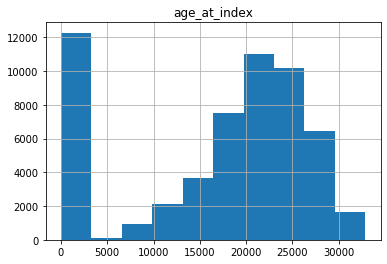

In [40]:
pd.DataFrame.hist(demos, column='age_at_index')

In [44]:
demos['age'] = demos['age_at_index'] // 365

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb945fcff28>]],
      dtype=object)

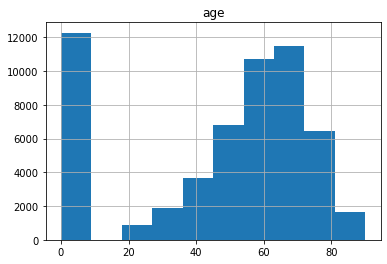

In [45]:
pd.DataFrame.hist(demos, column='age')

In [46]:
demos['age'].describe()

count    55978.000000
mean        46.206385
std         27.327178
min          0.000000
25%         31.000000
50%         56.000000
75%         67.000000
max         90.000000
Name: age, dtype: float64

In [58]:
data.columns

Index(['updated_datetime', 'submitter_id', 'case_id', 'id', 'disease_type',
       'diagnoses', 'sample_ids', 'diagnosis_ids', 'created_datetime',
       'submitter_aliquot_ids', 'demographic', 'state', 'aliquot_ids',
       'primary_site', 'slide_ids', 'submitter_sample_ids',
       'submitter_diagnosis_ids', 'submitter_slide_ids', 'index_date',
       'days_to_lost_to_followup', 'lost_to_followup', 'exposures',
       'portion_ids', 'submitter_analyte_ids', 'analyte_ids',
       'submitter_portion_ids', 'follow_ups', 'family_histories'],
      dtype='object')

In [68]:
demos['cause_of_death'].value_counts()

Cancer Related        111
Not Cancer Related     87
Unknown                 3
Not Reported            2
Name: cause_of_death, dtype: int64

In [69]:
target = data.loc[data['case_id'] == 'TCGA-HZ-A49G']

In [76]:
link = 'https://portal.gdc.cancer.gov/cases/47cb93bc-8f6b-4b2a-804c-bb4fc78df9e1?filters=%7B%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.case_id%22%2C%22value%22%3A%5B%2247cb93bc-8f6b-4b2a-804c-bb4fc78df9e1%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22genes.is_cancer_gene_census%22%2C%22value%22%3A%5B%22true%22%5D%7D%7D%5D%2C%22op%22%3A%22and%22%7D'

target = data.loc[data['case_id'] == '47cb93bc-8f6b-4b2a-804c-bb4fc78df9e1']

In [89]:
td = target['demographic']
td = td[23530]

In [92]:
target.columns

Index(['updated_datetime', 'submitter_id', 'case_id', 'id', 'disease_type',
       'diagnoses', 'sample_ids', 'diagnosis_ids', 'created_datetime',
       'submitter_aliquot_ids', 'demographic', 'state', 'aliquot_ids',
       'primary_site', 'slide_ids', 'submitter_sample_ids',
       'submitter_diagnosis_ids', 'submitter_slide_ids', 'index_date',
       'days_to_lost_to_followup', 'lost_to_followup', 'exposures',
       'portion_ids', 'submitter_analyte_ids', 'analyte_ids',
       'submitter_portion_ids', 'follow_ups', 'family_histories'],
      dtype='object')

In [104]:
t2 = data.loc[data['case_id'] == '9924e309-5c47-42fe-b937-547f2b3d6842']
t2d = t2['demographic']

In [110]:
target

,updated_datetime,submitter_id,case_id,id,disease_type,diagnoses,sample_ids,diagnosis_ids,created_datetime,submitter_aliquot_ids,...,index_date,days_to_lost_to_followup,lost_to_followup,exposures,portion_ids,submitter_analyte_ids,analyte_ids,submitter_portion_ids,follow_ups,family_histories
23530,2019-08-06T14:42:49.422828-05:00,TCGA-HZ-A49G,47cb93bc-8f6b-4b2a-804c-bb4fc78df9e1,47cb93bc-8f6b-4b2a-804c-bb4fc78df9e1,Ductal and Lobular Neoplasms,"[{'year_of_diagnosis': 2012, 'classification_o...","[c05920dc-cd24-4d6c-b749-81b3833e5a95, 2b44f6c...",[94d51d39-7ed8-5406-a473-3b319a34501e],None,"[TCGA-HZ-A49G-01A-11D-A77V-36, TCGA-HZ-A49G-01...",...,NaN,NaN,NaN,"[{'cigarettes_per_day': None, 'weight': None, ...","[7eef0840-a188-43ff-a85f-2a61653bbd63, 5583c83...","[TCGA-HZ-A49G-10A-01W, TCGA-HZ-A49G-01A-11R, T...","[2f40dfaf-0800-46f1-bf99-1af9f67a4531, 0b64fd3...","[TCGA-HZ-A49G-10A-01, TCGA-HZ-A49G-01A-11]",NaN,NaN


In [112]:
t2d = t2d[t2d.keys()[0]]

In [121]:
t2di = t2['diagnoses']

In [122]:
t2di = t2di[t2di.keys()[0]]

In [125]:
t2di

[{'year_of_diagnosis': 2009,
  'classification_of_tumor': 'not reported',
  'last_known_disease_status': 'not reported',
  'updated_datetime': '2019-08-08T17:19:44.867503-05:00',
  'primary_diagnosis': 'Infiltrating duct carcinoma, NOS',
  'submitter_id': 'TCGA-3A-A9I5_diagnosis',
  'tumor_stage': 'not reported',
  'age_at_diagnosis': 21175,
  'morphology': '8500/3',
  'days_to_last_known_disease_status': None,
  'created_datetime': None,
  'prior_treatment': 'No',
  'ajcc_pathologic_n': 'N0',
  'ajcc_pathologic_m': 'MX',
  'state': 'released',
  'days_to_recurrence': None,
  'diagnosis_id': 'e05953e9-460f-515f-bef0-6911a96dff45',
  'tumor_grade': 'not reported',
  'treatments': [{'days_to_treatment_start': None,
    'updated_datetime': '2019-07-31T15:34:18.028800-05:00',
    'treatment_effect': None,
    'initial_disease_status': None,
    'treatment_type': 'Pharmaceutical Therapy, NOS',
    'submitter_id': 'TCGA-3A-A9I5_treatment_1',
    'treatment_id': '37fabb57-6402-5c5a-a601-94fe5

In [134]:
def checkLen(df, column):
    return df.dropna(subset=[column])[column].map(len).value_counts()

In [139]:
t3 = data.loc[data['submitter_id'] == 'TCGA-HV-A5A6']

In [152]:
t3e = json_normalize(t3['diagnoses'].tolist()[0][0])

In [159]:
t3e.columns

Index(['year_of_diagnosis', 'classification_of_tumor',
       'last_known_disease_status', 'updated_datetime', 'primary_diagnosis',
       'submitter_id', 'tumor_stage', 'age_at_diagnosis', 'morphology',
       'days_to_last_known_disease_status', 'created_datetime',
       'prior_treatment', 'ajcc_pathologic_n', 'ajcc_pathologic_m', 'state',
       'days_to_last_follow_up', 'days_to_recurrence', 'diagnosis_id',
       'tumor_grade', 'treatments', 'icd_10_code', 'days_to_diagnosis',
       'tissue_or_organ_of_origin', 'progression_or_recurrence',
       'prior_malignancy', 'ajcc_staging_system_edition',
       'ajcc_pathologic_stage', 'synchronous_malignancy',
       'site_of_resection_or_biopsy', 'ajcc_pathologic_t'],
      dtype='object')

In [166]:
t3.columns

Index(['updated_datetime', 'submitter_id', 'case_id', 'id', 'disease_type',
       'diagnoses', 'sample_ids', 'diagnosis_ids', 'created_datetime',
       'submitter_aliquot_ids', 'demographic', 'state', 'aliquot_ids',
       'primary_site', 'slide_ids', 'submitter_sample_ids',
       'submitter_diagnosis_ids', 'submitter_slide_ids', 'index_date',
       'days_to_lost_to_followup', 'lost_to_followup', 'exposures',
       'portion_ids', 'submitter_analyte_ids', 'analyte_ids',
       'submitter_portion_ids', 'follow_ups', 'family_histories'],
      dtype='object')

In [171]:
t3d = json_normalize(t3['demographic'])

In [182]:
td['cause_of_death']

KeyError: 'cause_of_death'

In [183]:
dias = json_normalize(data['diagnoses'].tolist()[0][0])

In [200]:
dias = json_normalize(data.dropna(subset=['diagnoses'])['diagnoses'].apply(lambda x: x[0]))

In [205]:
dias.columns

Index(['progression_or_recurrence', 'classification_of_tumor',
       'last_known_disease_status', 'tumor_grade', 'tissue_or_organ_of_origin',
       'created_datetime', 'updated_datetime', 'primary_diagnosis',
       'submitter_id', 'site_of_resection_or_biopsy',
       ...
       'anaplasia_present_type', 'days_to_diagnosis',
       'ajcc_staging_system_edition',
       'medulloblastoma_molecular_classification', 'cog_renal_stage',
       'synchronous_malignancy', 'metastasis_at_diagnosis_site',
       'ovarian_surface_involvement', 'gleason_grade_group', 'treatments'],
      dtype='object', length=106)

In [207]:
demos['days_to_death'].isnull().value_counts()

True     78288
False     4799
Name: days_to_death, dtype: int64

In [209]:
dias['days_to_last_follow_up'].isnull().value_counts()

True     66320
False    16766
Name: days_to_last_follow_up, dtype: int64

In [220]:
demos['over_50'] = [1 if x >= 50 else 0 for x in demos['age']]

In [230]:
grouped = demos.groupby(['gender', 'race', 'ethnicity', 'over_50'], as_index=False).count()

In [231]:
grouped['race'].value_counts()

Unknown                                      16
white                                        16
black or african american                    16
asian                                        14
other                                        13
american indian or alaska native             13
not reported                                 11
native hawaiian or other pacific islander     5
not allowed to collect                        5
unknown                                       3
Name: race, dtype: int64

In [234]:
demos['ethnicity'].value_counts()

not hispanic or latino    47540
not reported              31640
hispanic or latino         3102
Unknown                     805
Name: ethnicity, dtype: int64